# HIPÓTESE B

Hipótese A: formas diferentes de definir o ângulo $0^{o}$ no encoder produzem novas incertezas durante a aquisição dos dados.
        
Hipótese B: bancadas com inclinações diferentes produzem novas incertezas durante a aquisição dos dados.
        
Hipótese C: a calibração do acelerômetro pode influenciar no ângulo medido pelo aplicativo. Portanto, celulares diferentes devem aferir inclinações diferentes mesmo estando na mesma posição.
        
Hipótese D: o número $n$ de amostras em cada componente do acelerômetro pode influenciar na incerteza tipo A e, portanto, na incerteza final.

## Importando Pacotes

In [1]:
import matplotlib.pyplot as plt
from numpy import array, absolute, sqrt, mean

## Declarando os Arrays

### Bancada Referência

In [2]:
encoderRef = array([000.0000, 010.1250, 020.0249, 030.1499, 040.0499, 050.1749, 060.0750, 070.1999, 080.0999, 090.0000])
appRef = array([1.05289, 9.47259, 19.28821, 29.52762, 39.82796, 49.63186, 60.1355, 70.63422, 81.69838, 90.9581])
ictzAppRef = array([0.00262, 0.01033, 0.02402, 0.02662, 0.04231, 0.05239, 0.07453, 0.07015, 0.05507, 0.08004])
ictzEncRef = array([0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225])

### Bancada 2

In [3]:
encoder2 = array([000.0000, 010.3500, 020.0249, 030.1499, 040.0499, 050.1749, 060.0750, 070.1999, 080.0999, 090.0000])
app2 = array([1.24565, 11.65316, 21.13914, 31.02725, 40.42583, 51.33817, 61.02775, 71.45375, 82.57568, 92.62852])
ictzApp2 = array([0.05452, 0.0111, 0.02914, 0.03811, 0.04626, 0.05423, 0.06097, 0.0645, 0.05472, 0.07214])
ictzEnc2 = array([0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225])

## Aparência dos Gráficos

In [4]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5], 
          'axes.labelsize': 15,
          'axes.titlesize':19, 
          'font.size': 13,
          'legend.fontsize': 13, 
          'xtick.labelsize': 11, 
          'ytick.labelsize': 11,
          'axes.axisbelow': True
         }

plt.rcParams.update(params)

## Plotando

### Referência

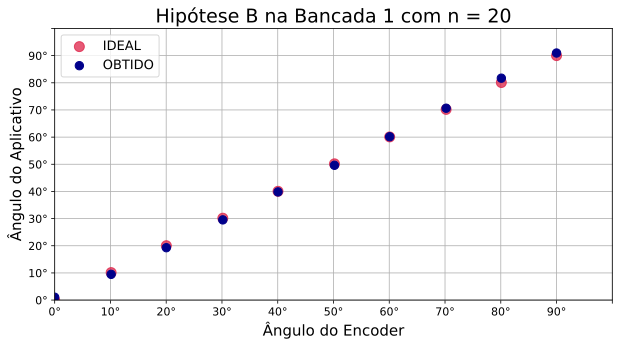

In [5]:
#PLOTANDO A IDEAL
plt.scatter(encoderRef, encoderRef, s=100, alpha=0.7, label="IDEAL", color="crimson")

#PLOTANDO A COMPARAÇÃO
plt.scatter(encoderRef, appRef, s=70, label="OBTIDO", color="darkblue")

#OUTROS PARÂMETROS DO GRÁFICO
plt.legend()
plt.title('Hipótese B na Bancada 1 com n = 20')
plt.xlabel('Ângulo do Encoder')
plt.ylabel('Ângulo do Aplicativo')
plt.xlim(0, 90)
plt.ylim(0, 90)
plt.xticks(array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]), ['0°', '10°', '20°', '30°', '40°', '50°', '60°', '70°', '80°', '90°'])
plt.yticks(array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]), ['0°', '10°', '20°', '30°', '40°', '50°', '60°', '70°', '80°', '90°'])
plt.grid(True)

plt.savefig('PDF/hipoteseBRef.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig('EPS/hipoteseBRef.eps', format='eps', bbox_inches = 'tight')

#EXIBINDO
plt.show()


### Bancada 2

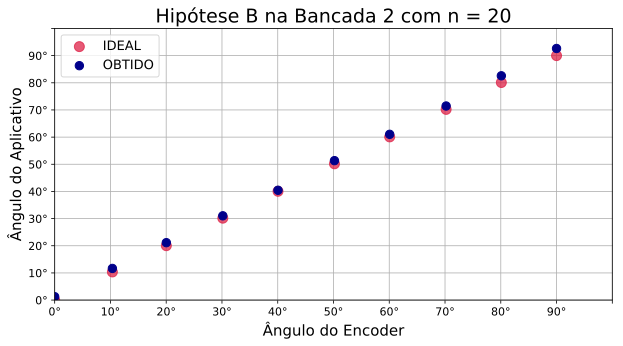

In [6]:
#PLOTANDO A IDEAL
plt.scatter(encoder2, encoder2, s=100, alpha=0.7, label="IDEAL", color="crimson")

#PLOTANDO A COMPARAÇÃO
plt.scatter(encoder2, app2, s=70, label="OBTIDO", color="darkblue")

#OUTROS PARÂMETROS DO GRÁFICO
plt.legend()
plt.title('Hipótese B na Bancada 2 com n = 20')
plt.xlabel('Ângulo do Encoder')
plt.ylabel('Ângulo do Aplicativo')
plt.xlim(0, 90)
plt.ylim(0, 90)
plt.xticks(array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]), ['0°', '10°', '20°', '30°', '40°', '50°', '60°', '70°', '80°', '90°'])
plt.yticks(array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]), ['0°', '10°', '20°', '30°', '40°', '50°', '60°', '70°', '80°', '90°'])
plt.grid(True)

plt.savefig('PDF/hipoteseBbancada2.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig('EPS/hipoteseBbancada2.eps', format='eps', bbox_inches = 'tight')

#EXIBINDO
plt.show()


## ERROS NORMALIZADOS

### Referência

In [7]:
# GERANDO O ARRAY DE ERROS NORMALIZADOS PARA N = 1
erroNormalRef = []
pontilhada = []

for i in range(0, len(appRef)):
    dividendo = absolute(appRef[i] - encoderRef[i])
    divisor = sqrt((2*ictzAppRef[i])**2 + (2*ictzEncRef[i])**2)
    erroNormalizadoAtual = dividendo / divisor
    
    erroNormalRef.append(erroNormalizadoAtual)
    pontilhada.append(1)
    
erroNormalRef = array(erroNormalRef)
pontilhada = array(pontilhada)

[]

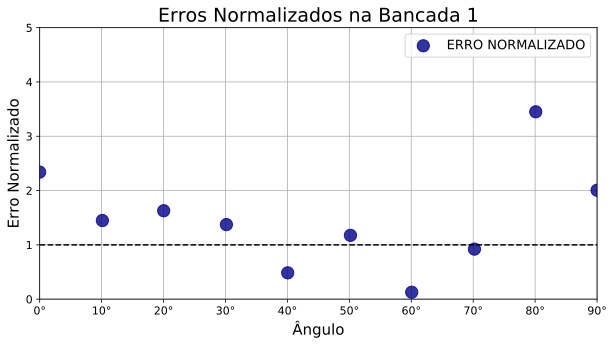

In [8]:
#PLOTANDO OS ERROS
plt.scatter(encoderRef, erroNormalRef, s=150, alpha=0.8, label="ERRO NORMALIZADO", color="darkblue")

#PLOTANDO A PONTILHADA
plt.plot(encoderRef, pontilhada, '--', color="black")

#OUTROS PARÂMETROS DO GRÁFICO
plt.legend()
plt.title('Erros Normalizados na Bancada 1')
plt.xlabel('Ângulo')
plt.ylabel('Erro Normalizado')
plt.xlim(0, 90)
plt.ylim(0, 5)
plt.xticks(array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), ['0°', '10°', '20°', '30°', '40°', '50°', '60°', '70°', '80°', '90°'])
plt.grid(True)

plt.savefig('PDF/hipoteseBErroNormalizadoRef.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig('EPS/hipoteseBErroNormalizadoRef.eps', format='eps', bbox_inches = 'tight')

plt.plot()

### Bancada 2

In [9]:
# GERANDO O ARRAY DE ERROS NORMALIZADOS PARA N = 9
erroNormal2 = []
pontilhada = []

for i in range(0, len(app2)):
    dividendo = absolute(app2[i] - encoder2[i])
    divisor = sqrt((2*ictzApp2[i])**2 + (2*ictzEnc2[i])**2)
    erroNormalizadoAtual = dividendo / divisor
    
    erroNormal2.append(erroNormalizadoAtual)
    pontilhada.append(1)
    
erroNormal2 = array(erroNormal2)
pontilhada = array(pontilhada)

[]

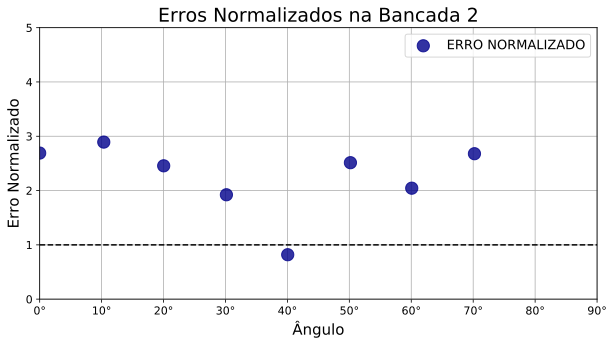

In [10]:
#PLOTANDO OS ERROS
plt.scatter(encoder2, erroNormal2, s=150, alpha=0.8, label="ERRO NORMALIZADO", color="darkblue")

#PLOTANDO A PONTILHADA
plt.plot(encoder2, pontilhada, '--', color="black")

#OUTROS PARÂMETROS DO GRÁFICO
plt.legend()
plt.title('Erros Normalizados na Bancada 2')
plt.xlabel('Ângulo')
plt.ylabel('Erro Normalizado')
plt.xlim(0, 90)
plt.ylim(0, 5)
plt.xticks(array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), ['0°', '10°', '20°', '30°', '40°', '50°', '60°', '70°', '80°', '90°'])
plt.grid(True)

plt.savefig('PDF/hipoteseBErroNormalizadoBancada2.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig('EPS/hipoteseBErroNormalizadoBancada2.eps', format='eps', bbox_inches = 'tight')

plt.plot()